In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("historical-weather.csv")

In [4]:
df.head(4)

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,100,2011-09-10 01:40:49,911.8,62.96,95.0,2.3,106.0,2.5,88.0,1.9,0.0,0.0,63.9
2,200,2011-09-10 03:20:49,911.4,68.00,53.0,0.3,69.0,0.5,19.0,0.2,0.0,0.0,33.4
3,300,2011-09-10 05:00:49,911.4,64.22,191.0,2.8,197.0,2.9,185.0,2.6,0.0,0.0,58.2


## We will work on 'air_pressure' and 'air_temp'

In [5]:
pres_temp_df = df.iloc[:,2:4]
pres_temp_df

,air_pressure,air_temp
0,912.3,64.76
1,911.8,62.96
2,911.4,68.00
3,911.4,64.22
4,912.2,52.70
...,...,...
15868,914.3,77.18
15869,914.4,77.00
15870,914.9,75.92
15871,915.7,75.38


### Checking if there is any null values, Removing if null values

In [6]:
pres_temp_df.isnull().sum()

air_pressure    0
air_temp        0
dtype: int64

In [7]:
pres_temp_df.dtypes

air_pressure    float64
air_temp        float64
dtype: object

In [8]:
pres_temp_df.describe()

,air_pressure,air_temp
count,15873.000000,15873.000000
mean,916.829163,61.854689
std,3.051722,11.835414
min,905.100000,32.360000
25%,914.800000,52.700000
50%,916.700000,62.420000
75%,918.700000,70.880000
max,929.400000,96.440000


### Let's look at the data on a scatterplot

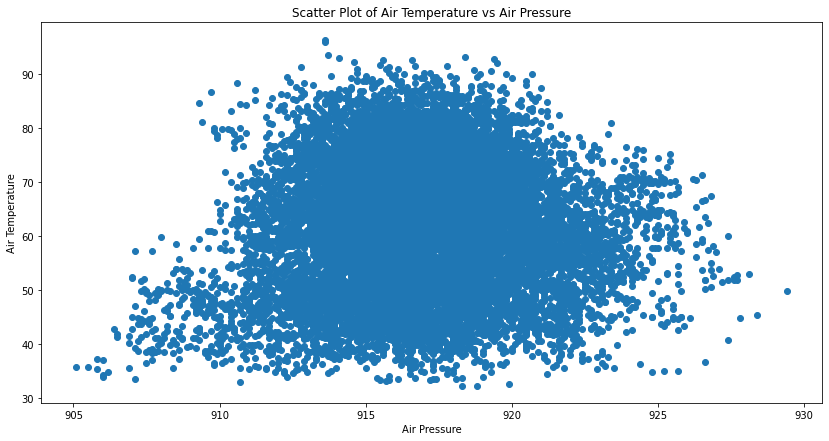

In [9]:
plt.figure(figsize=(14,7))
plt.scatter(pres_temp_df['air_pressure'], pres_temp_df['air_temp'])
plt.ylabel("Air Temperature")
plt.xlabel("Air Pressure")
plt.title("Scatter Plot of Air Temperature vs Air Pressure")
plt.show()

### Getting the inertia value for different k-means

In [10]:
# Let's look at the inertia from 2 - 20, plot it and find the right number using the elbow method.
kmeans_inertia = pd.DataFrame(data=[], index=range(2, 21), columns=['inertia'])

n_init = 10
max_iter = 300
tol = 0.0001
random_state = 663

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter, tol=tol, random_state=random_state)
    cutoff = 99
    kmeans.fit(pres_temp_df)
    kmeans_inertia.loc[n_clusters] = kmeans.inertia_

## Plotting the inertia (The Elbow Curve)

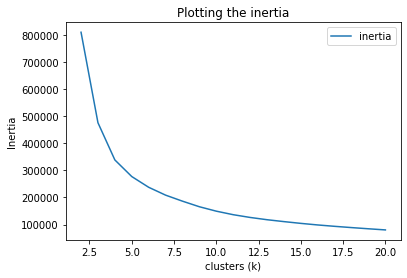

In [11]:
# Graph kmeans_inertia
# This should be unsurprising -- as we increase the number of clusters, the inertia falls
# ... and the performance increases
ax = plt.gca()

kmeans_inertia.plot(kind='line', y='inertia', ax=ax)
ax.set_xlabel('clusters (k)')
ax.set_ylabel('Inertia')
plt.title("Plotting the inertia")
plt.show()

## From the diagram above we can say that 4 clusters would be appropritate

In [12]:
kmeans4 = KMeans(n_clusters=4)
model_4 = kmeans4.fit(pres_temp_df)
y_kmeans4 = kmeans4.fit_predict(pres_temp_df)
print(y_kmeans4)

[0 0 0 ... 1 1 1]


In [13]:
kmeans4.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [14]:
kmeans4.cluster_centers_

array([[917.0061841 ,  67.12069343],
       [916.69010113,  77.99973644],
       [916.02845405,  45.1978454 ],
       [917.33276412,  56.40868852]])

In [15]:
# Input data
X = pres_temp_df.values
X

array([[912.3 ,  64.76],
       [911.8 ,  62.96],
       [911.4 ,  68.  ],
       ...,
       [914.9 ,  75.92],
       [915.7 ,  75.38],
       [915.9 ,  75.74]])

In [16]:
pres_temp_df_label = pres_temp_df.copy()
pres_temp_df_label['label'] = pd.Series(kmeans4.labels_, index=pres_temp_df.index)
colors = ["black", "green", "blue", "red"]
pres_temp_df_label['color'] = pres_temp_df_label['label'].map(lambda k: colors[k])
pres_temp_df_label

,air_pressure,air_temp,label,color
0,912.3,64.76,0,black
1,911.8,62.96,0,black
2,911.4,68.00,0,black
3,911.4,64.22,0,black
4,912.2,52.70,3,red
...,...,...,...,...
15868,914.3,77.18,1,green
15869,914.4,77.00,1,green
15870,914.9,75.92,1,green
15871,915.7,75.38,1,green


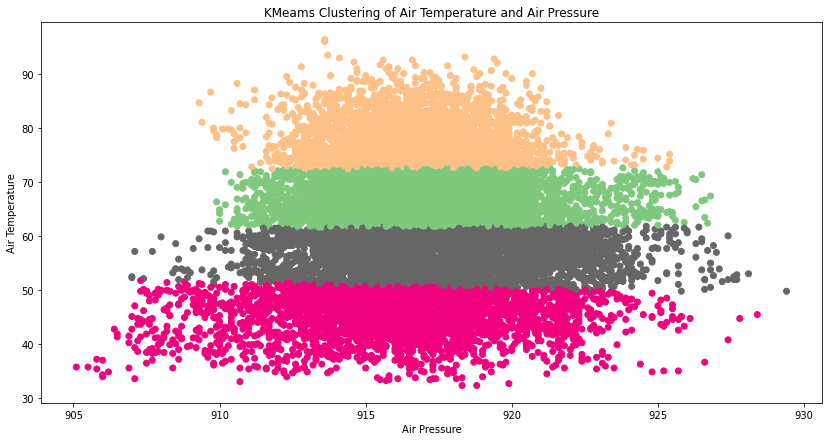

In [17]:
plt.figure(figsize=(14,7))
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans4, cmap = 'Accent')
plt.ylabel("Air Temperature")
plt.xlabel("Air Pressure")
plt.title("KMeams Clustering of Air Temperature and Air Pressure")
plt.show()

In [18]:
centroids = pd.DataFrame(model_4.cluster_centers_, columns=["x1", "x2"])
centroids

,x1,x2
0,917.006184,67.120693
1,916.690101,77.999736
2,916.028454,45.197845
3,917.332764,56.408689


### Testing Custom KMeans Function

In [19]:
import numpy as np
import random
import math
import statistics


class cluster:

    def __init__(self):
        pass

    def fit(self, X):
        pass
    

class KMeans(cluster):
    
    # initialize cluster size and maximum iterations
    def __init__(self, k = 5, max_iterations = 100) -> None:
        self.k = k
        self.max_iterations = max_iterations
        self.centroids = None
        self.labels = list()
        print("Custom KMeans function called")

    #====================== KMeans (Fit) ===========================
    
    def fit(self, X) -> None:
        """
        X is the list of n instances with several features that overall describe the n instances
        returns cluster labels and cluster centroids
        """
        # Initializing centroids in self.centroids
        self.place_k_centroids(X)

        print("Initial centroids = ", self.centroids,"\n\n")

        # Cluster Assignment & Move centroid step
        for _ in range(self.max_iterations):
            centroids = self.centroids
            distance = self.compute_eucl_dist_centroid_X(X, centroids)
            self.labels = self.finding_closest_cluster_to_X(distance, X)
            # Updating the centroids
            self.calculate_new_centroids(X, self.labels)
            if centroids == self.centroids:
                break;

        print("New centroids = ", self.centroids,"\n\n")
        return self.labels, self.centroids

    #================ KMeans Fit Extended ===========================
    
    def fit_extended(self, X, balanced = False) -> None:
        """
        X is the list of n instances with several features that overall describe the n instances
        balanced checks if each cluster have almost equal number of data points i.e. clusters must be balanced.
        returns cluster labels and cluster centroids
        """
        if(balanced == False):
            return self.fit(X)
        else:
            # Initializing centroids in self.centroids
            self.place_k_centroids(X)
            for _ in range(self.max_iterations):
                centroids = self.centroids
                distance = self.compute_eucl_dist_centroid_X(X, centroids)
                self.labels = self.finding_closest_cluster_balanced(distance, X)

                # Updating the centroids
                self.calculate_new_centroids(X, self.labels)
                if centroids == self.centroids:
                    break;
            return self.labels, self.centroids
        
    #================ Helper Functions ===========================

    # Initializing centroid as points fromt the data
    def place_k_centroids(self, X) -> None:
        random_init = np.random.randint(len(X), size=len(X))
        self.centroids = [X[s] for s in random.sample(random_init.tolist(), self.k)]
    
    # Computing the eucleadean distance from each data point to each centroid
    def compute_eucl_dist_centroid_X(self, X, centroids):
        distance = []
        # Storing the centroid distance for each X in collection of 4, but together
        #[dist(X1C1),dist(X1C2),dist(X1C3),dist(X1C4),dist(X2C1),dist(X2C2),dist(X2C3),dist(X2C4).....]
        for x in X:
            for k in centroids:
                distance.append(math.sqrt(((x[0] - k[0])**2 + (x[1] - k[1])**2)))
        return distance


    # finding the closest cluster to each data point based on the calculated distance values
    def finding_closest_cluster_to_X(self, distance, X) -> None:
        closest_cluster_indices = []
        # Note : Centroid distance for each X were stored as follows:
        #[dist(X1C1),dist(X1C2),dist(X1C3),dist(X1C4),dist(X2C1),dist(X2C2),dist(X2C3),dist(X2C4).....]
        # Extracting 'k' (4) at a time
        for i in range(len(X)):
            centr_dist_for_x_i = distance[( i * self.k ) : ( i * self.k ) + self.k]
            min_dis = min(centr_dist_for_x_i)
            centroid_chosen = centr_dist_for_x_i.index(min_dis)
            closest_cluster_indices.append(centroid_chosen)
        return closest_cluster_indices
    

    # Finding the closest cluster to each data point with 
    # Added new optional condition to assign equal data points to each cluster
    def finding_closest_cluster_balanced(self, distance, X):
        closest_cluster_indices = []
        balance_number = len(X)/self.k
        
        # Counting the number of points per centroid
        centroids_dict = {}
        for i in range(len(X)):
            # Centroid distance for x(i)
            centr_dist_for_x_i = distance[( i * self.k ) : ( i * self.k ) + self.k]
            min_dis = min(centr_dist_for_x_i)
            centroid_chosen = centr_dist_for_x_i.index(min_dis)

            while centroid_chosen in centroids_dict and centroids_dict[centroid_chosen] >= balance_number:
                # Increasing the centroid distance from point
                centr_dist_for_x_i[centroid_chosen] = 9999999
                centroid_chosen = centr_dist_for_x_i.index(min(centr_dist_for_x_i))

            centroids_dict[centroid_chosen] = centroids_dict.get(centroid_chosen, 0) + 1
            closest_cluster_indices.append(centroid_chosen)

        return closest_cluster_indices

    # calculating the new centroids for X
    def calculate_new_centroids(self, X, labels):
        centroid_dict = dict()
        new_centroids = []
        for k in range(0,self.k):
            data_points_list = list()
            for index,label in enumerate(labels):
                # Checking for a specific centroid label
                if(label == k):
                    data_points_list.append(X[index])

            # If none found, assigning a default centroid value
            if(len(data_points_list) == 0):
                data_points_list.append([0.0,0.0])
            
            centroid_dict[k] = data_points_list

        # Computing new centroid by taking a mean of the points
        for k_val in range(0,self.k):
            new_centroids.append([statistics.mean(i) for i in zip(*centroid_dict[k_val])])
            
        self.centroids = new_centroids

In [20]:
km_object = KMeans(4,100)
print("\nFitting the data:\n")
result_kmeans = km_object.fit(X.tolist())

Custom KMeans function called

Fitting the data:

Initial centroids =  [[915.1, 50.54], [922.1, 54.32], [918.3, 77.72], [913.4, 51.44]] 


New centroids =  [[916.036303630363, 45.27771377137714], [916.9913575214024, 67.3325764370159], [916.6807172066688, 78.14183076439132], [917.3496520763188, 56.60210101010101]] 




In [21]:
X_, cluster_assignments = result_kmeans

In [22]:
pres_temp_df_label2 = pres_temp_df.copy()
pres_temp_df_label2['label'] = pd.Series(X_, index=pres_temp_df.index)
pres_temp_df_label2


,air_pressure,air_temp,label
0,912.3,64.76,1
1,911.8,62.96,1
2,911.4,68.00,1
3,911.4,64.22,1
4,912.2,52.70,3
...,...,...,...
15868,914.3,77.18,2
15869,914.4,77.00,2
15870,914.9,75.92,2
15871,915.7,75.38,2


In [23]:
colors = ["black", "green", "blue", "red"]
pres_temp_df_label2['color'] = pres_temp_df_label['label'].map(lambda k: colors[k])
pres_temp_df_label2

,air_pressure,air_temp,label,color
0,912.3,64.76,1,black
1,911.8,62.96,1,black
2,911.4,68.00,1,black
3,911.4,64.22,1,black
4,912.2,52.70,3,red
...,...,...,...,...
15868,914.3,77.18,2,green
15869,914.4,77.00,2,green
15870,914.9,75.92,2,green
15871,915.7,75.38,2,green


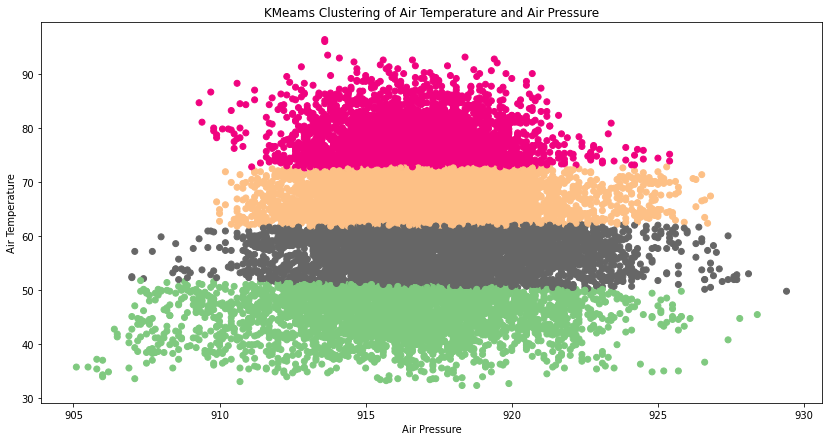

In [24]:
plt.figure(figsize=(14,7))
plt.scatter(X[:, 0], X[:, 1], c = X_, cmap = 'Accent')
plt.ylabel("Air Temperature")
plt.xlabel("Air Pressure")
plt.title("KMeams Clustering of Air Temperature and Air Pressure")
plt.show()

#### As can be seen from the both the KMeans visualizations above, the clusters have been formed containing same data points in Kmeans of sklearn and Custom Kmeans.

#### You can also see the same by looking at the group of labels assigned collectively, and same colors assigned voluntarily

In [25]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

display_side_by_side(pres_temp_df_label.head(20), pres_temp_df_label2.head(20))

,air_pressure,air_temp,label,color
0,912.3,64.76,0,black
1,911.8,62.96,0,black
2,911.4,68.00,0,black
3,911.4,64.22,0,black
4,912.2,52.70,3,red
5,912.4,54.50,3,red
6,913.3,57.74,3,red
7,913.7,62.24,0,black
8,913.3,66.20,0,black
9,913.1,61.34,3,red
